In [1]:
 #COMPLETE EDA PIPELINE ON THE TITATIC DATASET

In [2]:
#Importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load Dataset
df =sns.load_dataset("titanic")

In [5]:
df_copy = df.copy()

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df["age"].isnull().sum()

np.int64(177)

<Axes: xlabel='age', ylabel='Count'>

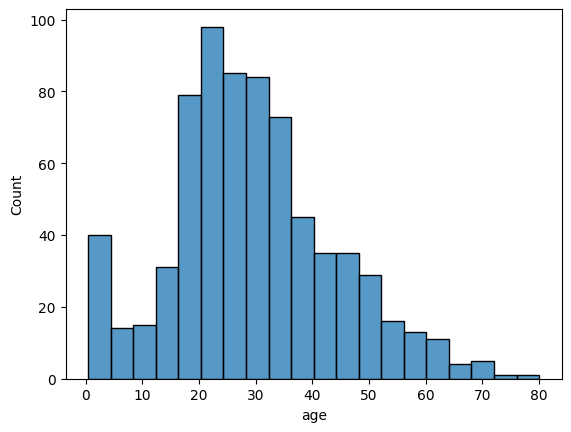

In [8]:
sns.histplot(df["age"])

Text(0.5, 1.0, 'Box plot of Age')

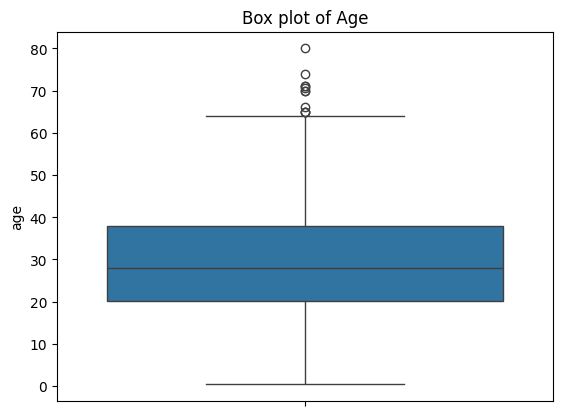

In [17]:
#Box plot to check outliers on colunm "Age"
sns.boxplot(df["age"])
plt.title("Box plot of Age")

In [10]:
#df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [11]:
df_copy.drop(columns=["deck"],inplace=True)

In [12]:
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [13]:
df_copy["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df_copy["embarked "].fillna(df_copy["embarked"].mode()[0],inplace=True)

KeyError: 'embarked '

In [20]:
#Encoding Categorical values
df_copy["sex"]= df_copy["sex"].map({"male":0,"female":1})

<ipython-input-23-711b403dd9ad>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family_size'] = df['sibsp'] + df['parch'] + 1
<ipython-input-23-711b403dd9ad>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_per_person'] = df['fare']/ df['family_size']


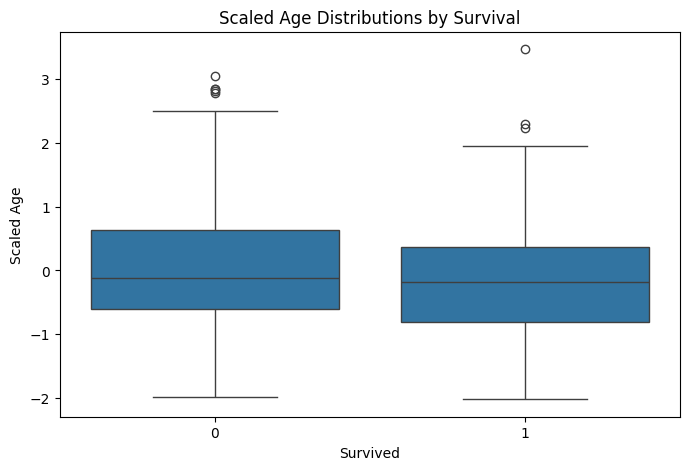

In [23]:
# Encode categorical variables
df["sex"]= df["sex"].map({"sex":0,"female":1})
df["embarked"]= df["embarked"].map({"S":0,"C":1,"Q":2})

#Scale numerical feature (basic standardization)
df['age_scaled'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['fare_scaled'] = (df['fare'] - df['fare'].mean()) / df['fare'].std()

#Outlier handing : Remove extreme 'fare' values
q1=df["fare"].quantile(0.25)
q3=df["fare"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["fare"]>=lower_bound) & (df["fare"]<=upper_bound)]

# feature engineering : create new features
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['fare_per_person'] = df['fare']/ df['family_size']

#Visualize cleaned data
plt.figure(figsize=(8,5))
sns.boxplot(x='survived',y='age_scaled',data=df)
plt.title('Scaled Age Distributions by Survival')
plt.xlabel('Survived')
plt.ylabel('Scaled Age')
plt.show()
